
# Statistical Report - HousingMarket

# **Part 1**

---
- Analyse the full dataset:
- Describe the nature of each variable: numerical, categorical, ordinal
- Add the main statistics depending on the nature of each variable:
mean, median, mode, sd, IQR, quartiles, range
- Create a histogram for each variable
- Create a piechart if the variable is binary

In [ ]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression

path = 'https://raw.githubusercontent.com/prof-apartida/data-exercises/main/'

df = pd.read_csv(path+'Housing3.csv')

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3430000,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
1,5950000,7231,3,1,2,yes,yes,yes,no,yes,0,yes,semi-furnished
2,4200000,5040,3,1,2,yes,no,yes,no,yes,0,no,unfurnished
3,4690000,6000,2,1,1,yes,no,yes,no,yes,1,no,furnished
4,4060000,4340,3,1,1,yes,no,no,no,no,0,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,7420000,7440,3,2,1,yes,yes,yes,no,yes,0,yes,semi-furnished
329,5523000,6900,3,1,1,yes,yes,yes,no,no,0,yes,semi-furnished
330,6475000,3960,3,1,1,yes,no,yes,no,no,2,no,semi-furnished
331,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished


In [ ]:
df = pd.DataFrame(df)
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,3.330000e+02,333.000000,333.000000,333.000000,333.000000,333.000000
mean,4.814749e+06,5114.963964,3.006006,1.300300,1.801802,0.756757
std,1.808833e+06,2172.164666,0.715550,0.508867,0.855385,0.890541
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.500000e+06,3510.000000,3.000000,1.000000,1.000000,0.000000
50%,4.382000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.810000e+06,6420.000000,3.000000,2.000000,2.000000,1.000000
max,1.225000e+07,15600.000000,5.000000,4.000000,4.000000,3.000000


6


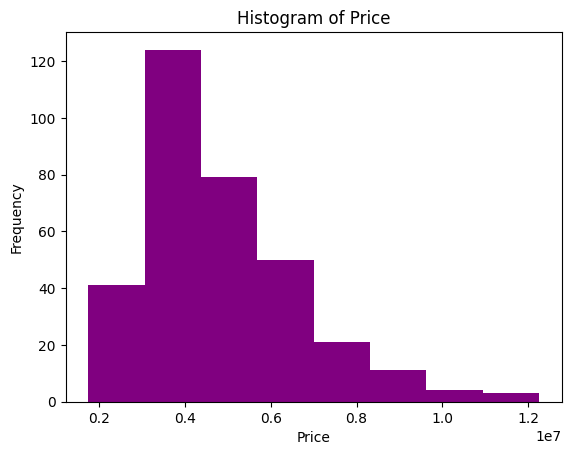

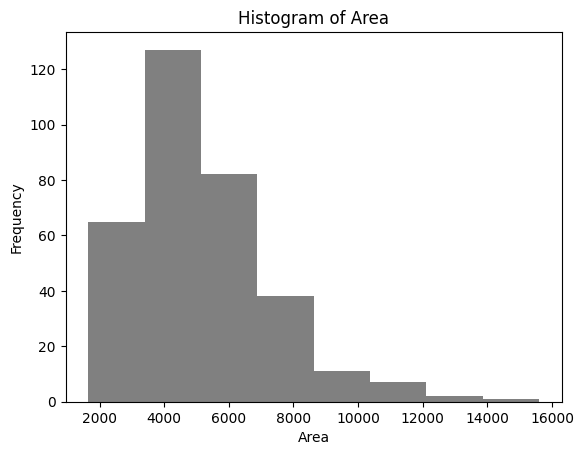

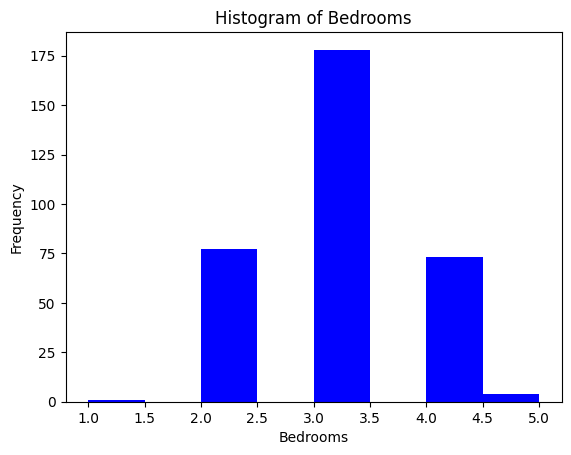

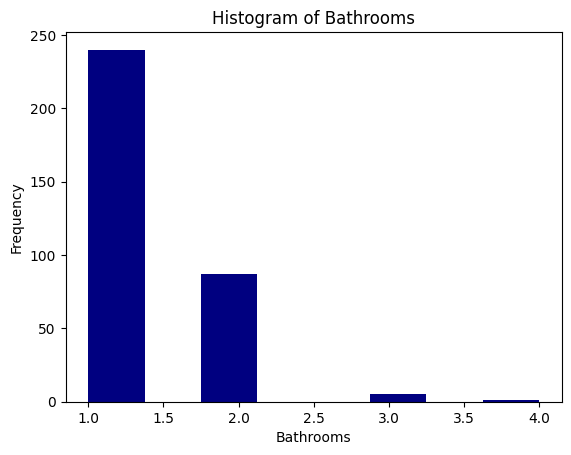

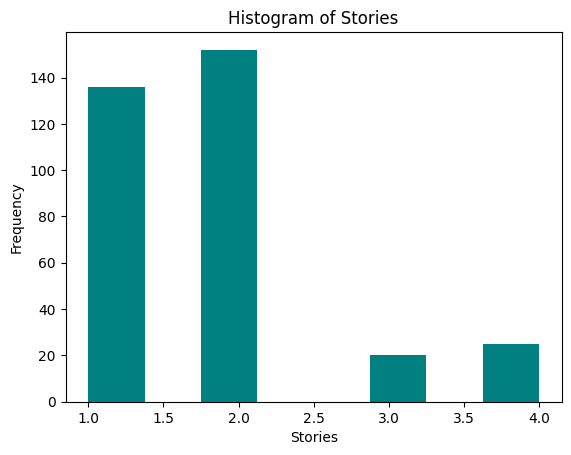

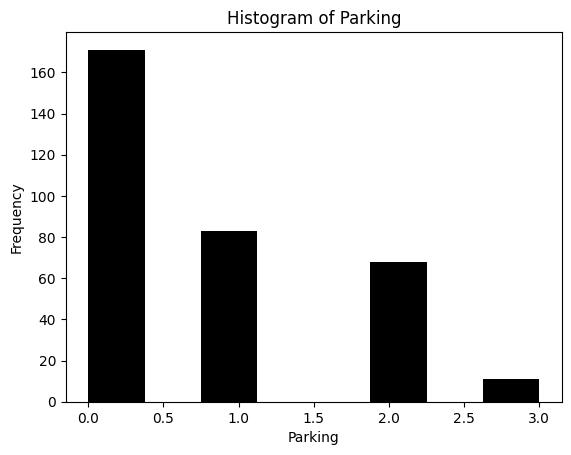

In [ ]:
# Creating a histogram for each numerical variable

array = [df['price'], df['area'], df['bedrooms'], df['bathrooms'], df['stories'], df['parking']]
print(len(array))
titles = ['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking']
colors = ['purple', 'gray', 'blue', 'navy', 'teal', 'black']

variable = 0
for variable in range(0, len(array)):
    plt.hist(array[variable], bins = 8, color = colors[variable])
    color = 'red'
    plt.xlabel(f'{titles[variable]}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {titles[variable]}')
    plt.show()

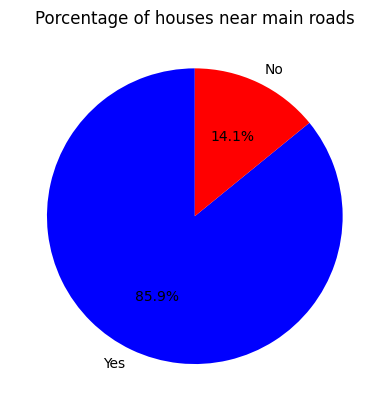

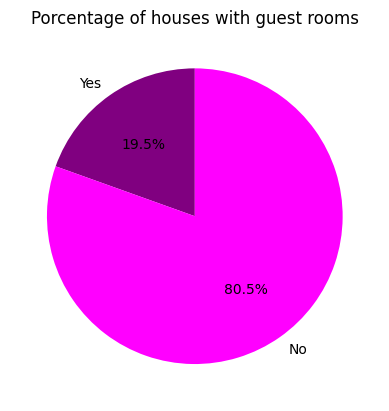

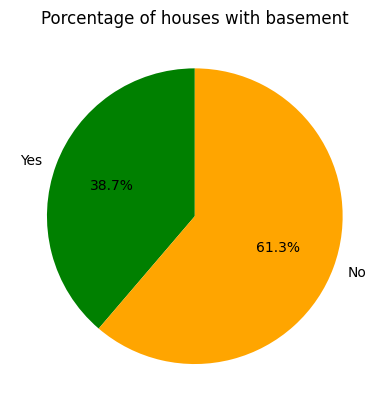

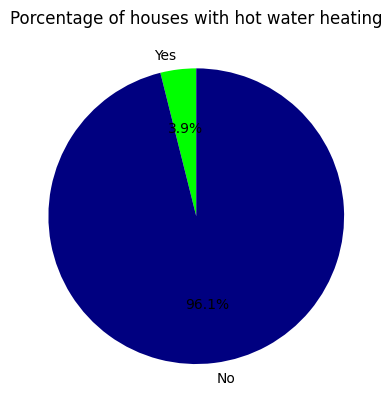

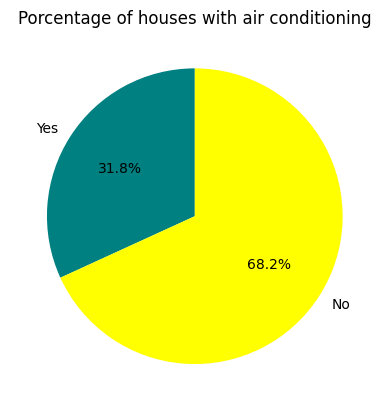

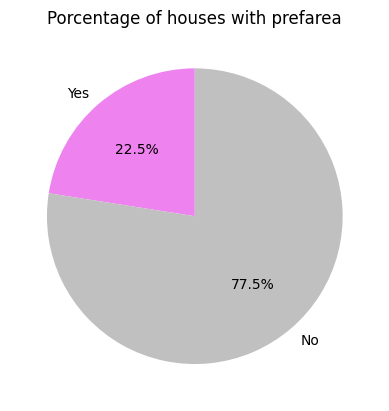

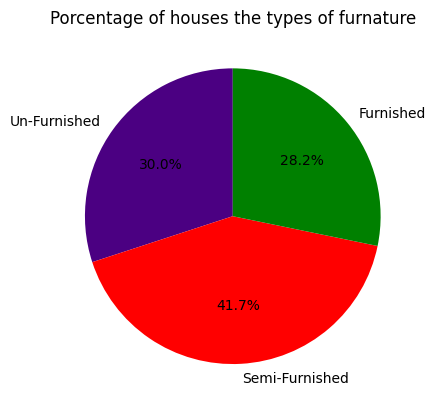

In [ ]:
# Creating piecharts for binary variables

array_cat = [df['mainroad'],df['guestroom'], df['basement'], df['hotwaterheating'], df['airconditioning'], df['prefarea']]
titles_cat = ['near main roads', 'with guest rooms', 'with basement', 'with hot water heating', 'with air conditioning', 'with prefarea']
color1 = ['blue', 'purple', 'green', 'lime', 'teal', 'violet']
color2 = ['red', 'magenta', 'orange', 'navy', 'yellow', 'silver']

for i in range(0,len(array_cat)):
  labels = 'Yes', 'No'
  sizes = [len(df[array_cat[i] == 'yes']), len(df[array_cat[i] == 'no'])]
  plt.pie(sizes, labels=labels, colors=[color1[i], color2[i]] ,autopct='%1.1f%%', startangle=90)
  plt.title(f'Porcentage of houses {titles_cat[i]}')
  plt.show()

labels2 = 'Un-Furnished', 'Semi-Furnished', 'Furnished'
sizes2 = [len(df[df['furnishingstatus'] == 'unfurnished']), len(df[df['furnishingstatus'] == 'semi-furnished']), len(df[df['furnishingstatus'] == 'furnished'])]
plt.pie(sizes2, labels=labels2, colors=['indigo', 'red', 'green'] ,autopct='%1.1f%%', startangle=90)
plt.title(f'Porcentage of houses the types of furnature')
plt.show()

# **Part 2**

---
- Suppose that your dataset is a full population (only for this bulletpoint):
- Calculate the minimum sample size needed and create a new dataset with this sample size
- Compare the mean of the sample with the population and see if the population fall within the defined
confidence interval

With the full dataset, perform hypothesis testing for determined variables based on your group
- Create a linear regression (LR) model based on the indicated variables
- Explain your findings and propose an investment strategy

In [ ]:
CL = 0.95 # Confidence level
p = 0.5 # expected prevalence, 50% if unkown
e = 0.03 # error
N = len(df) # population size

alpha_half = (1-CL)/2 # Calculate alpha/2
Z_score = st.norm.ppf(alpha_half+CL) # Get the Z value (tables) for the specified alpha
n = ((Z_score**2)*p*(1-p))/e**2 # Calculate the value of n (look at the formula in the slides)
sample_size = n/(1+(((Z_score**2)*p*(1-p))/((e**2)*N))) # Sample size for a limited population


print(f'The sample needed for a confidence level of {CL * 100}% , with an error of {e*100}% and with a population size of {N} is {round(sample_size, 0)}')

The sample needed for a confidence level of 95.0% , with an error of 3.0% and with a population size of 333 is 254.0


In [ ]:
percent = sample_size / len(df['price']) * 100
print(percent)
number = min(int(len(df['price']) * percent / 100), len(df['price']))  # Ensure 'number' does not exceed the population size

print(f'Number of samples chosen: {number}')
df['price'].sample(number)  # Show the chosen samples

76.21550712677677
Number of samples chosen: 253


,price
236,3535000
279,6895000
274,7210000
50,4550000
89,3290000
...,...
231,5243000
314,1767150
317,2835000
49,3290000


In [ ]:
#Caculate population and sample mean
mean_population = df.mean(numeric_only=True)
sample_size = 254
sample = df.sample(sample_size)
sample_mean = sample.mean(numeric_only=True)

CL = 0.95
z_score = st.norm.ppf(alpha_half + CL)

#Caculate the sample standar deviation and error
std_sample = sample.std(numeric_only=True)
standard_error = std_sample / np.sqrt(sample_size)

#Calculate the margin of error and the confidence interval
margin_of_error = z_score * standard_error

con = mean_population - (z_score*(std_sample/math.sqrt(sample_size)))
upper_lim = mean_population + (z_score*(std_sample/math.sqrt(sample_size)))
confidence_interval = (mean_population - (z_score*(std_sample/math.sqrt(sample_size))), (mean_population + (z_score*(std_sample/math.sqrt(sample_size)))))

#Check if the population mean falls within the confidence interval
is_within_confidence_interval = (confidence_interval[0] <= mean_population) & (mean_population <= confidence_interval[1])

#Results
print(f"Population Mean:\n{mean_population}\n")
print(f"Sample Mean:\n{sample_mean}\n")
print(f"95% Confidence Interval for Sample Mean:\n{confidence_interval}\n")
print(f"Does the population mean fall within the confidence interval?\n{is_within_confidence_interval}\n")


Population Mean:
price        4.814749e+06
area         5.114964e+03
bedrooms     3.006006e+00
bathrooms    1.300300e+00
stories      1.801802e+00
parking      7.567568e-01
dtype: float64

Sample Mean:
price        4.793884e+06
area         5.124980e+03
bedrooms     3.003937e+00
bathrooms    1.295276e+00
stories      1.787402e+00
parking      8.188976e-01
dtype: float64

95% Confidence Interval for Sample Mean:
(price        4.587355e+06
area         4.842344e+03
bedrooms     2.919565e+00
bathrooms    1.237083e+00
stories      1.697348e+00
parking      6.437402e-01
dtype: float64, price        5.042144e+06
area         5.387584e+03
bedrooms     3.092447e+00
bathrooms    1.363518e+00
stories      1.906256e+00
parking      8.697733e-01
dtype: float64)

Does the population mean fall within the confidence interval?
price        True
area         True
bedrooms     True
bathrooms    True
stories      True
parking      True
dtype: bool



In [ ]:
#Hypothesis Testing to check if the sample is representative from the population

# Ho : mean sample = mean population
# H1 : mean sample != mean population

pop_mean = df['area'].mean()
sample_mean = sample['area'].mean()
sd = sample['area'].std()
n = sample_size
CL = 0.95
testing = '='


alpha = 1-CL
Z_val = (sample_mean - pop_mean)/(sd/(math.sqrt(n)))

if testing == '=':
  p_val = st.norm.sf(abs(Z_val))*2
  level = alpha
else:
  p_val = st.norm.sf(abs(Z_val))
  level = alpha

Z_ref = st.norm.ppf(1-level)

print(f"The z_value is:\n {Z_val}\n")
print(f"The z_ref is:\n {Z_ref}\n")
print(f"The p_value is:\n {p_val}\n ")
print(f"Alpha is:\n {alpha}\n")


if p_val < level:
  print('Reject the null hypothesis')
else:
  print('Do not reject the null hypothesis')

The z_value is:
 0.07201122975693257

The z_ref is:
 1.6448536269514722

The p_value is:
 0.9425929710010477
 
Alpha is:
 0.050000000000000044

Do not reject the null hypothesis


**Conclusion**

---



When running the hypothesis testing, we concluded that the sample size is representative from the population, because the means are equal


# **Part 3**

---

With the full dataset, perform hypothesis testing for determined variables based on your group

In [ ]:

def check_normality(data):
    test_stat_normality, p_value_normality=st.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis: The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis: The data is normally distributed")

In [ ]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= st.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis: The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis: The variances of the samples can be considered the same.")

In [ ]:
sync = df['price'].dropna()
asyncr = df['bathrooms']

print('Checking set 1')
check_normality(sync)
print('\nChecking set 2')
check_normality(asyncr)

Checking set 1
p value:0.0000
Reject null hypothesis: The data is not normally distributed

Checking set 2
p value:0.0000
Reject null hypothesis: The data is not normally distributed


In [ ]:
check_variance_homogeneity(sync, asyncr)

p value:0.0000
Reject null hypothesis: The variances of the samples are different.


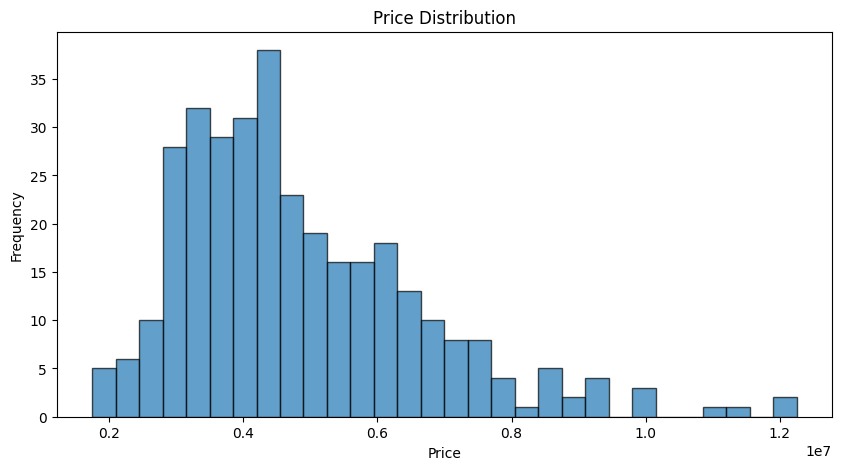

In [ ]:
#Checking if the distribution is normal or not
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

This result histogram suggests that the distribution of housing prices in this dataset does not follow a normal distribution and is skewed to the right

In [ ]:
#Checking the unique values in the columns of bathrooms and guestrooms and their frequency
guestroom_counts = df['guestroom'].value_counts()
bathroom_counts = df['bathrooms'].value_counts()
bathroom_counts, guestroom_counts

(bathrooms
 1    240
 2     87
 3      5
 4      1
 Name: count, dtype: int64,
 guestroom
 no     268
 yes     65
 Name: count, dtype: int64)

Hypothesis Testing for Price vs. Number of Bathrooms

Null Hypothesis (H0): The proportion of homes with higher prices (above median) and lower prices (below median) is independent of the number of bathrooms.

Alternative Hypothesis (H1): There is an association between home price (above or below median) and the number of bathrooms.ºº

In [ ]:
# Defining the median
median_price = df['price'].median()

# Creating a new column 'price_category' with 'high' if price > median, else 'low' as instructed
df['price_category'] = df['price'].apply(lambda x: 'high' if x > median_price else 'low')

#Creating a contingency table by crosstabulating price and guestrooms
contingency_table = pd.crosstab(df['price_category'], df['guestroom'])
# Running the ChiSquare test for price vs guestrooms
chi2_stat, p_value, dof, expected = st.chi2_contingency(contingency_table)
# Displaying Results
chi_square_results = {
    "Chi-Square Statistic": chi2_stat,
    "p-value": p_value,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected,
    "Observed Frequencies": contingency_table.values
}

chi_square_results

{'Chi-Square Statistic': 27.888006241504243,
 'p-value': 1.28544104459878e-07,
 'Degrees of Freedom': 1,
 'Expected Frequencies': array([[133.5975976,  32.4024024],
        [134.4024024,  32.5975976]]),
 'Observed Frequencies': array([[114,  52],
        [154,  13]])}

Given the significant p-value, we reject the null hypothesis and  conclude that
there is a strong association between a home’s price category (higher or lower than the median) and the presence of a guestroom.

Null Hypothesis (H0): The proportion of homes with higher prices (above median) and lower prices (below median) is independent of the presence of guestrooms.

Alternative Hypothesis (H1): There is an association between home price (above or below median) and the the presence of guestrooms.

In [ ]:
contingency_table_bathrooms = pd.crosstab(df['price_category'], df['bathrooms'])

chi2_stat_bathrooms, p_value_bathrooms, dof_bathrooms, expected_bathrooms = st.chi2_contingency(contingency_table_bathrooms)

chi_square_bathrooms_results = {
    "Chi-Square Statistic": chi2_stat_bathrooms,
    "p-value": p_value_bathrooms,
    "Degrees of Freedom": dof_bathrooms,
    "Expected Frequencies": expected_bathrooms,
    "Observed Frequencies": contingency_table_bathrooms.values
}

chi_square_bathrooms_results

{'Chi-Square Statistic': 46.55143978764533,
 'p-value': 4.329479477008669e-10,
 'Degrees of Freedom': 3,
 'Expected Frequencies': array([[119.63963964,  43.36936937,   2.49249249,   0.4984985 ],
        [120.36036036,  43.63063063,   2.50750751,   0.5015015 ]]),
 'Observed Frequencies': array([[ 92,  70,   3,   1],
        [148,  17,   2,   0]])}

Given the P-Value we rejct the null hypothesis. The significant p-value suggests a strong association between home price category (above or below median) and the number of bathrooms. This implies that higher-priced homes are more likely to have different distributions in the number of bathrooms than lower-priced homes.

# **Part 4**

---
Create a linear regression (LR) model based on the indicated variables

<ipython-input-181-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

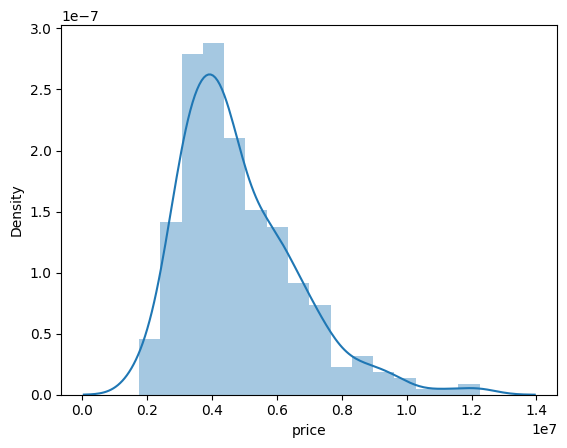

In [ ]:
sns.distplot(df['price'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

x = df[['area']]
y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
slr= LinearRegression()
slr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Printing the model coefficients and the model itself
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  [2476063.45869266]
Coefficient: [[464.16944296]]


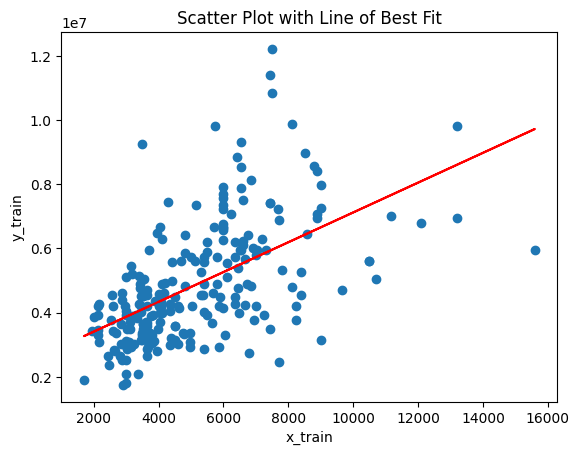

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert x_train to a NumPy array and reshape it
x_train_np = x_train.values.reshape(-1, 1)

# Create and fit the model
model = LinearRegression()
model.fit(x_train_np, y_train)

# Plot the scatter and best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train_np), color='red')  # Plot the line using model predictions
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Scatter Plot with Line of Best Fit')
plt.show()

In [ ]:
import statsmodels.api as sm
X2 = sm.add_constant(x_train) # Add a column with the constant values
est = sm.OLS(y_train, X2) # Ordinary least squares method
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           5.93e-21
Time:                        12:47:20   Log-Likelihood:                -3647.6
No. Observations:                 233   AIC:                             7299.
Df Residuals:                     231   BIC:                             7306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.476e+06   2.51e+05      9.875      0.0

In [ ]:
y_pred_slr= slr.predict(x_test)
x_pred_slr= slr.predict(x_train)

In [ ]:
y_test = y_test.to_numpy().ravel()  # Convert DataFrame to NumPy array and flatten
y_pred_slr = y_pred_slr.ravel()  # Assuming y_pred_slr is already a NumPy array

# Create the DataFrame
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
0,3780000,5.182171e+06
1,5600000,4.796911e+06
2,5523000,5.678833e+06
3,4200000,5.168246e+06
4,7343000,7.786162e+06
...,...,...
95,5950000,5.378979e+06
96,4935000,5.236943e+06
97,3150000,3.900599e+06
98,7140000,5.261080e+06


In [ ]:
# Fit the model
mlr.fit(x_train, y_train)

# Print the R-squared value for the test set
print('R squared value of the model: {:.2f}'.format(mlr.score(x_test, y_test) * 100))

R squared value of the model: 34.02


# **Key Findings and Interpretation**

---


R-squared Value:

The R-squared value of the model is 0.318, as shown in the OLS summary, and around 32.5%. This means that the model explains only 32% of the variance in the price based on the area. This low R-squared suggests that while area does have a relationship with price, other significant factors that affect the price are missing from the model. It implies that area alone isn't be a strong predictor of price and that additional features should be considered for a more accurate model.

Statistical Significance:

Both the intercept and the area coefficient have p-values close to 0, indicating that these coefficients are statistically significant at conventional significance levels (0.05). This means that the relationship between area and price observed in the sample data is unlikely to be due to random chance.

Regression Line and Scatter Plot:

The scatter plot with the red regression line shows a general upward trend, which is expected from the positive coefficient. However, there is a lot of scatter around the line, which tells us that area alone can't fully explain price variation. This aligns with the low R-squared we obtained.

Actual vs. Predicted Values:

The table of actual vs. predicted values shows us that the model does not perfectly match actual prices, likely because of the low R-squared and the simplicity of our single-variable model. Some predicted values are close to the actual values, while others deviate in a significant way.


# **Proposed Business Strategy**

---


While our model is only determined by area, we've identified a few key strategies that could help maximize returns by considering factors beyond size alone:

Invest in Large Properties with High-Value Features:
Larger properties generally sell for more, but the value increases significantly when they come with desirable features like a prime location, modern finishes, and quality amenities. Look for properties that combine size with these extra qualities to maximize potential returns.

Target Under-Valued Large Properties in Growing Neighborhoods:
Consider investing in bigger properties within up-and-coming areas where prices are still relatively low. As these neighborhoods develop and attract more amenities, property values are likely to appreciate, offering substantial returns on investment.

Diversify to Spread Risk:
Since area alone doesn’t capture all price influences, don’t rely on size as the only factor. Invest in a range of properties across different locations, types, and price points to create a balanced portfolio that can weather market fluctuations.